<a href="https://colab.research.google.com/github/thedarredondo/data-science-fundamentals/blob/main/Unit2/Unit2NotesAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following are the installations and libraries neccesary to run the code in these notes. Some of the libraries in this course are so new that they aren't preinstalled on the Google servers that collabratory runs on. We'll need to reninstall them each time we get the "runtime disconnect message"

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.9/500.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


In [2]:
#We'll also need to re-import those libraries

#makes pretty flow charts of our models, known as kruschke diagrams
#from pykrusch import krusch

import preliz as pz

In [3]:
#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

#**Unit 2: Probability with a Pinch of Python**

We will spend this entire unit trying to answer a single question: What will Victor Wembanyama's true Free Throw percentage (FT%) be in the NBA?

This will acomplish three things:

1. Give you a foundation upon which to grow your inuition about probability and predictive models.
2. Show you that any question about the real world can be made arbitrarily complicated.
3. Help emphasize that there are always many ways to answer a question.

Here's a word salad of things you'll learn in this unit: mean, mode, median, the three axioms of probability, Bayes' Rule, prior, likelihood, posterior,  probability denisty function, uniform distribution, beta distribution, and binomial distribution.

We will also introduce the most basic version of a pymc model, a code skeleton from from which we will summon many predictive monsters in the coming units.

Let's dive in.

###**Free Throws**

Victor Wembanyama is a profesional basketball player for the San Antonio Spurs NBA team. In the summer of 2023, Wembanyama had yet to play a game in the NBA, although he had played in other professional leagues in France.

There was a lot of hype around how good a player Wembanyama would be in the NBA, and many questions, one of which was: How good would Victor Wembanyama be at shooting the basketball?

One metric to use is Free Throw Percentage (FT%). In basketball, players are awared an unobscured attempt to toss a basketball into a hoop (the main goal of the game) under certain condtions. All free throws are shot from the same spot, and players either make of miss the shot. Made free throws award the player's team 1 point, and missed free throws award 0 points.

###**Assumptions: Modeling Free Throws Prior Information**
Let's try to figure out what Victor Wembanyama's free throw percentage will be in the NBA.

First, let's acknowledge that we **must** make an assumptions in order to make a guess. We'd *have* to make an assumption, even if only to assume that every possible free throw percentage is equally likely.

**Task1**: So, what is Wembanyama's most likely free throw percentage, if all possible free throw percentages are equally likely and we otherwise know nothing about Wembanyama or free throws?

**Answer1**:

Need to know:
- 'all possible values equally likely' means the unifrom distribution
- some guesses are better than others; if everything is equally likely, the everything is most likely. Finding the expected value is more usful guess
- uniform dist has expected value/mean of whatever the middle value is--in this case, its 0.5, or 50%
- guesses are statistics.

-----------

Nice to Know:

First, all possible free throws percentages are any number between 0 and 100, but let's redefine our percentages as decimals from 0 to 1. Second, since any percentage is the most likely, we'll instead answer with the expected free throw percentage.
But before I go any further, let "expected free throw percentage"  be the mean, and the "most likely free throw percentage" be the mode.
We can think of the expected percentage as the the percentage which is "closest" to all the other possible percentages.
This "expected value minimizes how "wrong" we are.

From the graph below, notice that all the possible percentages form a single horizontal line. The point that is closest to (or least far away) from the other points is the middle of the line, which corresonds to an x value of $0.5$. This means that, assuming all possible percentages are equally likely, the expected percentage is $50$.

Below is a graph showing every possible free throw percentage on the x-axis. The y-axis goes from $0$ to $1$, and the blue line happens to be at $y=1$. The blue line is horizontal to represent that each x value, or proportion, is equally likely.

Don't worry about understanding this graph or the code that generated it right now. It's here for when you reference these notes later.

<Axes: >

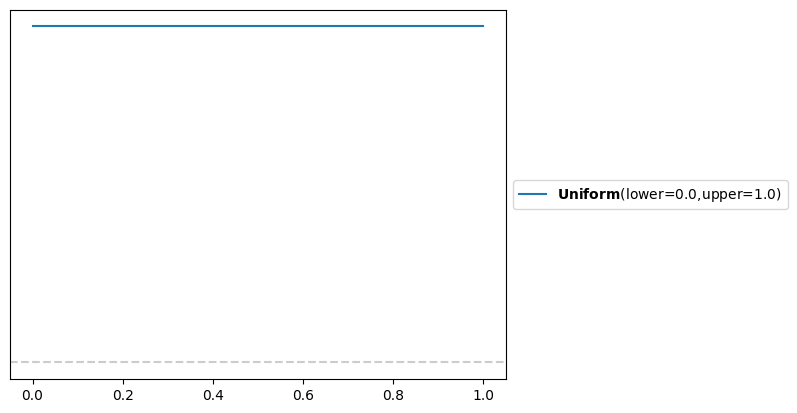

In [ ]:
pz.Uniform(0,1).plot_pdf() # plots the uniform distribution

In order to predict free throw percentage, we had to make an asumption.

It turns out that assumptions are required for more than predicting free throw percentage--**assumptions are required to predict/guess anything uncertain**.
All of reality, and everything in it, is at least functionally uncertain (...probably...). Therefore, we need to make assumptions in order to make any logical statements about the state of the world we live in.

Instead of worrying about the world and all reality, let's go back to predicting free throw percentage.

Since we had to make an assumption to get an answer, let's see if we can do better than "all possible answers are equally likely." What do we know about Wembanyma's free throw shooting?


Wembanyama played professionally in the Euroleague, and he made 24 out 32 free throws or $\frac{24}{32}=0.75$ free throws. You may be tempted to say the expected proportion of made free throws is $0.75$--and it is--but only reporting that is throwing away information.
For example, $\frac{24}{32}=\frac{3}{4}$, but Wembanyama didn't shoot just 4 free throws, he shot 32. We need a way to show that seeing the outcome of more free throws increases how confident we are in our estimate.

**Task2**:

In order to do that, we're gonna need to do some math. Not calculations (those are for your computer), rather, we'll define a free throw by its relevant, logical parts.

What about a free throw are we recording? In other words, what about a free throw do we care about?

**Answer2**:

Need to Know:

To make a logical guess about something uncertain:
- turn the parts you care about into numbers
- write down rules for how those numbers get generated

--------

Nice to Know:

- Free throws are either make or miss, 1 point or 0 points.
- Free throws are taken by the same player, and that player has some chance of making a free throw
- At any given time, we know exactly how many makes and misses a given player has
- One free throw does not affect the next free throw--the next free throw will be taken from the same spot and the player will use the same shooting motion.

That last one is called independence, and may seem like a dubious assumption to you right now. Later in the course we'll learn the skills to account for dependence; for now, we'll assume that free throws, at least among NBA players, behave independently.

In summary, a free throw is some process that has a probability of outputing a 1 or 0.

Before we go further, we know to define 'uncertainty' the way we defined free throws: by breaking uncertainty into its relevant, logical parts.

Also, instead of the word 'uncertainty', we'll use the word 'probability'.

**Task3**:

Take a moment to think about what "probablity" means.

Ask at least one other person what they think it means.

Write your definition, and at least one other person's definition. Pick which one you like best, or make a new definition that combines the two.

**Answer3**:

Need to Know:

A probability has three properties:
- It is a function from the set of all possible events/outcomes to the positive real numbers.
- If two events/outcomes cannot happen at the same time (they are mutually exclusive), then the probablities of those events add together.
- The sum of the probability of all possible mutally exclusive events is $1$. In other words, all probabilites are between $0$ and $1$.

That was a readable "version" of the three axioms of probability. A formal statement of the axioms can be found [here.](https://en.wikipedia.org/wiki/Probability_axioms)

___________________

Nice to Know:

When we think of proability in this class, we should think about the pattern of observing an event, like Victor Wembanyama making a free throw. For free throws, we have an event, like a basketball going through a hoop, that we turn into a number (1 point) when we observe the event occur.

We only want to talk about events pretaining to the outcome of a free throw. I don't care if the crowd cheers or boos; I only care about how many points Wembanayma earns through free throws. This limits what I'm looking for, and helps focus my attention. I want to ignore all events other than the possible outcomes of Wembanyam shooting a free throw to score a point in a basketball game. I call these the "favorable outcomes", or "events of interest"

Finally, I consider the proportion of favorable outcomes to total outcomes. This proportion will be my probablitiy of Victor Wembanyama making a free throw.





Now that we know what a probablity is, we can use those 24 out of 32 free throws we've "seen" Victor Wembanyama shoot.

Each of those 32 free throw attempts had some probability of going through the hoop and generating a point. We'll call that probability $\theta$ (pronouced "theta") since we don't know what it is, and because greek letters make me feel like I'm a real mathematician.

Since Wembanyama made 24 made free throws, we have 24 $θ$s, and we'll call each of the 8( = 32 - 24) misses $1-θ$.

As a reminder, those 32 free throw attempts are helping us form an assumption about the probability of Wembanyama's free throw percentage being any particular number. Before, we said it was euqally likely to be any possible free throw percentage.

One more notational thing: let $p()$ read "the probability of ___". Thus, $p(\theta)$ reads "the probability of the true probability of Victor Wembanyama making a free throw".

Returing to the "equally likely" assumption, we basically said $p(θ) ∼ Uniform(0,1)$ or $p(θ) \sim U(0,1)$. This reads "the true probability of Victor Wembanyama making a free throw is uniformly distributed within the interval 0 to 1".


**Task4**:

Guess how we could write the distribution of the true probability of Wembanyama making a free throw, but now with the prior knowledge that he made 24 out of 32 free throws in Euroleage play.

**Answer4**:

Need to Know:

As long as you thought we needed to account for how each of the 24 makes and 8 misses interact with each other, you're on the right track.

It's even better if you thought 24 makes meant 24 $θ$s and 8 misses meant 8 $(1-θ)$s

--------
Nice to Know:

$p(θ)=\frac{Γ(32)}{Γ(24)Γ(8)}θ^{24-1}(1-θ)^{8-1}=\frac{31!}{23!7!}θ^{23}(1-θ)^{7}$

...let me explain.

First off, let's ignore the weird fraction with factorials for now. That leaves us with $θ^{24-1}(1-θ)^{8-1}$, which we can think of as:

(the probability of *making* a free throw)$^{24-1}$(the probability of *missing* a free throw)$^{8-1}$.

In simplistic terms, we are multiplying all the free throws together. The scary fraction I told you to ignore is roughly the number of possible combinations of 24 makes out of 32 attempts.

By the way, that equation up there has a name: the probability distribution known as the beta distribution. Its written as follows:

$θ ∼ Beta(α=24, β=8)$

or

$p(θ) = Beta(α=24, β=8)$

This is graphed below:

<Axes: >

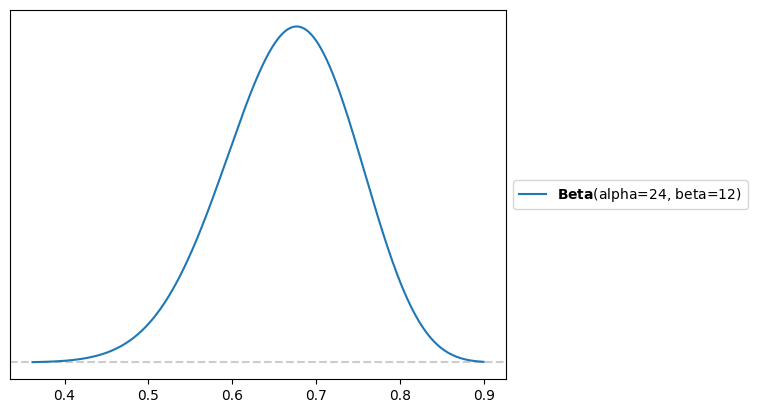

In [4]:
#plotting the beta distribution with shape parameter 24 and scale parameter 12
pz.Beta(alpha=24,beta=12).plot_pdf()

**Task5**:

Which prior distribution is better, the $Beta(α=24, β=8)$ distribution, or the $U(0,1)$ distribution.

Why?

**Answer5**:

Need to Know:

Prior selection is arbitrary. Ideally, we create a prior that has all our relevant prior information in it.

----

Nice to Know:

I can make an argument for either--so I will.

For the uniform distribution, I could say that Euroleague basketball play is totally different from NBA play in terms for skill and talent of the competitors, so no information from that league should influnce my prediction.

I think that's a tenuous argument though.

For the Beta distribution, I could say that free throws are the same regardless of what league the game is played in, and therefore those free throws should inform my guess of Victor Wembanyama's future free throw percentage in the NBA.

I think the second argument is much more sound.

Additionally, their are other options. We can actually turn the NBA average into its own beta distribution, we could decide to "mix" the different priors, we could let our priors have priors (Unit 4, heirarchical models).

There are many possible decisions; what you should focus on now is making a decision, and justifying it to yourself.

###**Predictions with only prior knowledge**

Recall that we wanted to predict Victor Wembanyama's free throw percentage. While there are technically infinte guesses we could make--any percentage under the blue curve above is valid--we now have a precise way of saying what the expected/average free throw percentage is, and the the most likely/probable free throw percentage. Also try to find the "middle" percentage, AKA the median.

**Task6**:

Find Wembanyama's expected FT%, middle FT%, and most likely FT% based only on the free throws he shoot in Euroleage

In [5]:
#ANSWER6

#store the prior distribution for the Free Throw (FT) percentage
FT_prior = pz.Beta(alpha=24,beta=8)

#preliz does not have a function that returns the mode, so I will use a formula
FT_prior_mode = (FT_prior.alpha - 1)/(FT_prior.alpha + FT_prior.beta - 2)

#the mean mean first, then median, and finally mode
FT_prior.mean(), FT_prior.median(), FT_prior_mode

(0.75, 0.7552582743060792, 0.7666666666666667)

**Answer6 cont.**

Need to Know:

There are different ways to make a guess, even within the same assumption(s). Some guesses are more useful than others, depending on the context.

----

These estimates of Wembanyama's FT percentage (about 75%, 75.52%, and 76.66% respectively) each minimize how "wrong" our guess will be, according to different things, called loss functions.

The point here is not to understand the mean, median, mode, or loss functions , but to emphasize that our best guess, or prediction, is arbitrary even once we've solidified our assumptions in a prior. I'll state it this way: we have three best guesses, and they are all equally valid, depending on what we want. [There are also a lot more than three...](https://youtu.be/TQjHrRxEqu0?si=Oj6D5fy_yBzLYaf1)but these are the most popular ways to guess, and we'll see why in the next unit.

When I say "guess" I mean "prediction"; predictions are guesses, and we'll spend the enitre course trying to figure out better ways to guess, and ways to figure out if our guesses/predicitons are good.

And if our predictions aren't good--if none of 66.7%, 67%, and 67.6% seems right once we've seen Wembanayama shoot free throws in the NBA--we'll need to account from what we've observed.

###**Acknowledging our Observations: Modeling Free Throws from the NBA**

In this section, we will learn a rule for how to change our predictions as we gain more information, or data.

For now, that new information will be "seeing" Victor Wembanyama shoot free throws in an NBA game.

Right now, we have a prior, $p(θ) = Beta(α=24, β=8)=\frac{Γ(α+β)}{Γ(α)Γ(β)}θ^{α-1}(1-θ)^{β-1}=\frac{31!}{23!7!}θ^{23}(1-θ)^{7}$

This represents that we don't know Wembanyama's true free throw percentage, but we do know he made 24 out of 32 free throws in Euroleague basketball. Specifically, $θ$ represents his true chance of making a free throw.



Put that aside for now. Consider this information, or these data: we observe Wembanyama make 7 out 9 free throws in his first 2 NBA games. Let's consider the chance, or likelihood, of this happening.

Made free throws are represented by $θ$, and misses by $1-θ$. Because free throws are independent, we can again represent a bunch of makes and misses through multiplication.


**Task7**:

Write down an expression for the likelihood of seeing these data (7 made free throws out of 9) given we know the true free throw rate $θ$.

**Answer7**:

Need to Know:

As long as you thought we needed to account for how each of the 7 makes and 2 misses interact with each other, you're on the right track.

It's even better if you thought 7 makes meant 24 $θ$s and 2 misses meant 8 $(1-θ)$s

Notation: $p(y|θ)$ reads "the probability of seeing Wembanayam make 7 out of 9 free throws in the NBA given what Wembanyama's true free throw percentage".

The "$|$" means the word "given". $y$ is 'the data' and $\theta$ is the true  probability that he makes a free throw.

Here's yet another way of looking at it:

$p(y|θ)=p($7 makes out of 9 $|$ what we know about the true FT%$)$

In other words, $y$ is the data of whatever we're interested in, and $θ$ is our assumptions and knowldege about the truth of whatever we're interested in prior to seeing the data.

--------

Nice to Know:

$p(y|θ)=Binomial(n=9,k=7,θ)=\binom {n}{k}θ^{k}(1-θ)^{n-k}=\frac{9!}{(9-7)!7!}θ^{7}(1-θ)^{2}$

This is know as the binomial distribution. Again, you can think of that scary first term as the number of combinations of 7 makes out of 9 attempts. If this looks very similar to the Beta distribution, its because it is. The difference is subtle, and has to do with the relationship between the binomial coefficent $\binom nk$ and multinomial coefficent $\binom{n+1}{k,1,n−k}$. [Here's](https://stats.stackexchange.com/questions/4659/relationship-between-binomial-and-beta-distributions) a link to a full explanation; the highest voted response is the one you want to focus on.

$y$ represents the observed data, or information. In this case, that means the 7 made free throws out of 9 attempts in for Wembanayam in his first 2 NBA games.

This is different from the 24 out of 32 makes from his Euroleague days becuase:

- we are specifically interested in his performance in the NBA
- we are pretending to "see" him shoot free throws as the game NBA season progresses.


We've seen preliz's function for our prior in this scenario, $Beta(α,β)$. Preliz also has a nice function for the binomial distribution, shown below:

<Axes: >

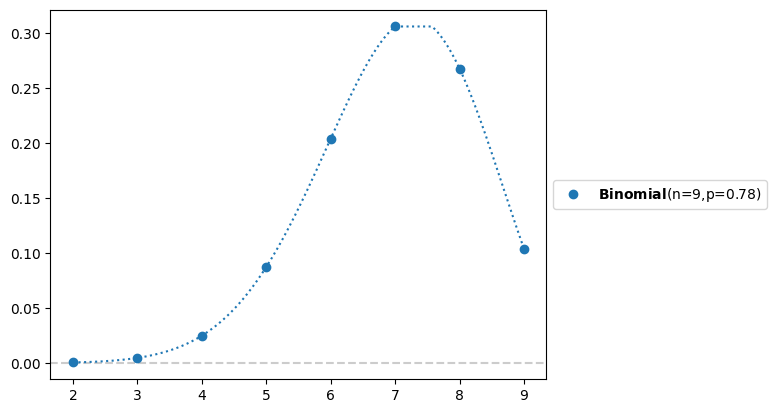

In [ ]:
pz.Binomial(n = 9, p = 7/9 ).plot_pdf()

###**Updating our Predictions/Beliefs**

Let's review what we've learned.:

- We have a formula for our **prior** knowledge about Wembanayma's free throw shooting from his play in Euroleague, $p(θ) = Beta(α=24, β=8)=\frac{31!}{23!7!}θ^{23}(1-θ)^{7}$. (This prior is our way to guess before we've seen any anything about the NBA.)
- We have a formula for the **likelihood** that Wembanyama made 7 out of 9 free throws in his first two NBA games, $p(y|θ)=Binomial(n=9,k=7,θ)=\frac{9!}{(9-7)!7!}θ^{7}(1-θ)^{2}$

and also what we want:

- A prediction of Wembanyama's true free throw percentage in the NBA, $θ$, given that we've seen him make 7 out of 9 free throws in the NBA,  $p(θ|y)$. This prediction is **post**, or after, seeing data and making assumptions.



Thus far, when we have two probablities that happen in conjunction, we have multiplied them. That trend will continue here.

**Task8**:

Write a formula for knowing both the likelihood and the prior in this free throw example.


**Answer8**:

Need to know:

The likelihood and prior happening at once -> $p(y|θ)p(θ)$

This is called the posterior, which controls our guesses post data and assumptions. Notation: $p(θ|y)=p(y|θ)p(θ)$

----

Need to Know:

This invovles a bit of algebra. Prepare yourself.

We start by multipling both our likelihood and prior:

$p(y|θ)p(θ) = \frac{9!}{(9-7)!7!}θ^{7}(1-θ)^{2}\frac{31!}{23!11!}θ^{23}(1-θ)^{11}$

$=\frac{9!}{(9-7)!7!}\frac{31!}{23!11!}θ^{7+23}(1-θ)^{2+11}=\frac{9!}{(9-7)!7!}\frac{31!}{23!11!}θ^{30}(1-θ)^{13}$

To dive into what that means, let's generalize it:

$p(y|θ)p(θ) = \frac{n!}{(n-k)!k!}θ^{k}(1-θ)^{n-k}\frac{(α + β -1)!}{(\alpha-1)!(β-1)!)}θ^{α-1}(1-θ)^{β-1}$

$=\frac{n!}{(n-k)!k!}\frac{(α + β -1)!}{(\alpha-1)!(β-1)!)}θ^{k+α-1}(1-θ)^{n-k+β-1}$

On that final line, ignore the fractions out front, and focus on the terms with $θ$. Recall that that $θ$ is Wembanyama's true free throw percentage in the NBA.

$θ^{k+α-1}(1-θ)^{n-k+β-1}$

If we let $α_{new}=k+α$ and $β_{new}=n-k+β$, then we get:

$θ^{α_{new}-1}(1-θ)^{β_{new}-1} ∼ Beta(α_{new}=k+α, β_{new}=n-k+β)$

Notes on that last line:

- $k+α$ is the number of makes in the NBA plus the number of makes we've seen before Wembanyama played in the NBA.

- $n-k+β$ is the number of misses in the NBA plus the number of misses before the NBA.


We now have our answer--or at least, a formula for getting one.

The probability of Victor Wembanayma's true free throw percentage in the NBA given the free throws we've seen him shoot thus far is:

$p(θ|y) ∝ p(y|θ)p(θ) = Beta(α_{new}=α+k,β_{new}=n-k+β)$

The $∝$ reads "proportional to". Its a statement we use instead of an equal sign that allows us to drop the scracy fractions. Those "scary fractions" will get subsumed into a [normalizing constant](https://en.wikipedia.org/wiki/Normalizing_constant#:~:text=In%20probability%20theory%2C%20a%20normalizing%20constant%20is%20a%20constant%20by,or%20a%20probability%20mass%20function.). More on that later, but for now, all you need to know is this:

The models we create need to know about $θ$--the thing we want to predict--and how $θ$ intereacts with the world. Our computer is capable of handling the rest.

**Task9**:

Now that we have a formula, let's use our computer to answer our question: "What do we expect Victor Wembanyama's true free throw percentage to be?"

*Hint*: Is there code on elsewhere on this notebook for the Beta distribution?

In [6]:
#ANSWER9

#prior information
alpha_old = 24
beta_old = 8

#likelihood info, or data from the NBA
k = 7 #makes
n = 9 #total attempts

#'analytic' here means that we found the solution directly using a closed form
# mathematical formula
analytic_FT = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

#Wembanyama' expected FT%. Mode and median are also acceptable, but note that I
#said 'expect', which techinally calls for the mean.
analytic_FT.mean()

0.7560975609756098

While that constitutes our best guess, the 'real' answer is the whole distribution, shown below

<Axes: >

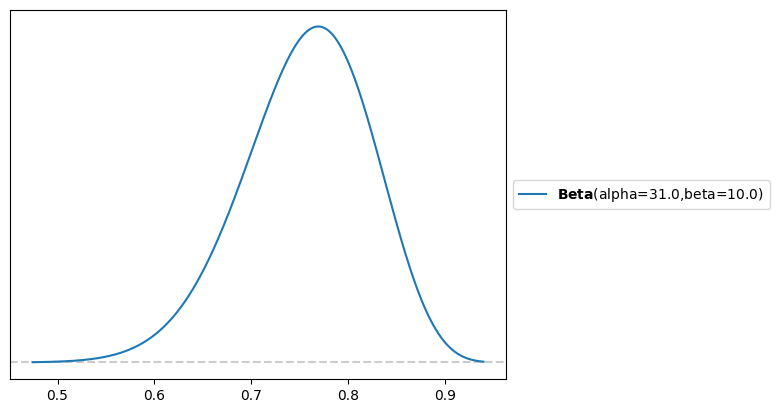

In [ ]:
analytic_FT.plot_pdf()

Let's linger on my last statement:

"the 'real' answer is the whole distribution"

**Task10**:

Why is the whole distribution better than a single point estimate, a single guess?

**Answer10**:

Need to Know:

The whole distribution communicates all our uncertainty. A single point estimate or statistic obscures how uncertain we are about our guess.

----

Nice to Know:

A single number guess overstates how confident we are in guessing. The entire distribution represents all possible guesses we could make (given our assumptions), AND tells us how likely each guess is. The height of the curve represents how likely we are to see a particular $θ$.

For example, $θ$ is Wembanyama's true free throw percentage in the NBA, so the $θ$ associated with the highest point on the curve is Wembanayma's most likely FT%, or the mode. But other FT%s near the mode are also very likely, so anything near the mode is a more than reasonable guess. Unfortunately (fortunately?), "near the mode" is entirely up to us to determine--we'll elaborate more on that each unit.

The point is that the whole posterior distribution, the whole curve, gives all the information about our guess.

Now that we have some inuition and skills on how to guess Wembanyama's FT%, a natural extension is to wonder if we can predict the results of his actual free throws.

###**Probabalistic Programming: Predicting Free Throws**

This is where things get interesting.

There is an analytic (formulaic and exact) solution to predicitng Wembanyams's future free throws, but we won't use it here for two reasons.
- It involves calculating this integral: $ \int_{}^{} p(\tilde{y}|θ)p(θ|y) \,dθ  $, where $\tilde{y}$ is predicted data, or, in this case, predicted free throws.
- The approximate, or sampling, method we'll use instead will work even in situations where that integral is intractable.


 To avoid ever having to calculate that integral, we will need to make use of a powerful technique known as Markov Chain Monte Carlo (MCMC). Eventually we will cover a version of MCMC in more depth, but even then, we will not cover precisely what's happening underneath the hood with pymc.

 pymc is the library of functions we'll use to build our model, and it will underpin every model we'll build going forward. Imagine its like a car. Cars have all sorts of features now a days, from power steering and automatic transmission, to blind spot warnings and lane assist. They can't quite drive themselves yet, but even if they could, there's nothing stopping us from manually driving one off a cliff, warning lights be damned.

 We will learn how to avoid using our model to drive ourselves off a cliff, and we will also learn how to make use of its fancy bells and whistles. Hopefully, this will be just as empowering as getting behind the wheel. Like a car has a complicated engine powering its capabilites, a pymc model has a complicated MCMC engine powering its capablities, and you don't really need to know how either work to take it for a drive.

**But remember**: Things will break.
This course will teach you how to drive, not how to be a mechanic. Often there are warning lights to help with this, but sometimes not--and there's no warning light in the world that can protect you from yourself.

Let's return to coding.

Before we make any predictions about future FTs, we need to redo our entire anaylsis with a library called pymc.

In [ ]:
#loading pymc, the fancy library of functions that allows us to only focus on θ
import pymc as pm

In [ ]:
#the makes we've seen from the NBA
FT_makes = np.repeat(1, 7)

#the misses we've seen from the NBA
FT_misses = np.repeat(0, 2)

#combine makes and misses into one array
FT_data = np.concatenate( [FT_makes,FT_misses] )

#the last three lines can be combined into one line
#FT_data = np.repeat([1,0], repeats = [7,2])
#Which method of making FT_data is easier to understand?

In [ ]:
#Nearly every single model we will build in this class will have
#the below outline as its foundation. Get hyped.

with pm.Model() as wmby_FT_model:
  #we define our prior with the makes and misses from Euroleague
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('θ' , alpha = 24. , beta = 8.)

  #we define our likelihood, which is how we process the free throws
  #we've seen Wemby make in the NBA
  #Think of Bernoulli as a stand in for the binomial distribution
  #It doesn't have inherent info about number of attempts, but number of attempts
  #is included in the data anyway.
  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_FT = pm.sample(1000)


The last line of code in the previous code block draws 1000 $θ$s for us to play with. What does that mean? Let's start with a picture:




In [ ]:
#arviz is a companion data visualization library for pymc
import arviz as az

<Axes: title={'center': 'θ'}>

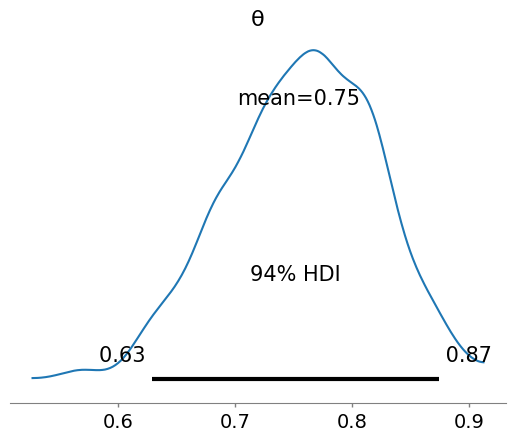

In [ ]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT)

Let's compare this to the analytic solution.

<Axes: >

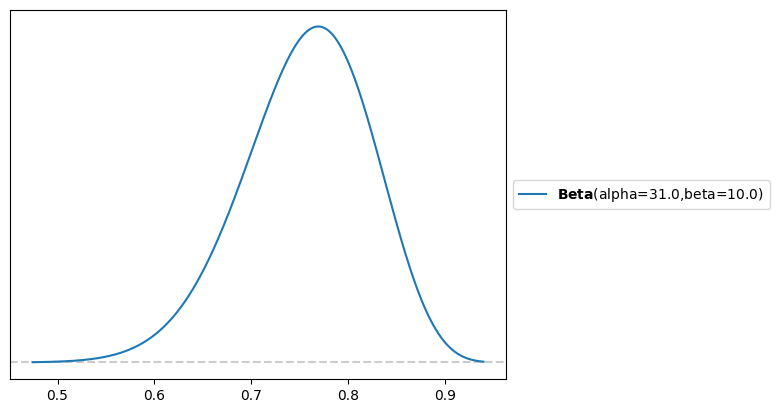

In [ ]:
#probability density function (pdf) of the analytic solution
analytic_FT.plot_pdf()

**Task11**:

List similarities and differences between the pymc model's samples, and the analytic model's pdf. Discuss these with at least one other person

**Answer11**:

Let's point out some differences and similarites:

- the pymc model is an approximation drawn by the 1000 samples; imagine all the $θ$s are piled up over there repective value on the horizontal axis. This process makes the graph "lumpy".
- the pymc model has a "94% HDI" or 94% highest posterior density interval. That means there is about a 94% chance of Wembanyama's true NBA FT% being between 63% and 88%. Why 94%? No reason, its just the default. Why have it at all? Some people think its nice.
- Despite the lumpiness of the pymc model, it has roughly the same shape, mean, and scale as the analytic model.


To see why this is the case, let's draw 1000 sample FT%s from the analytic model, just like we did from the pymc model.

<Axes: title={'center': 'θ'}>

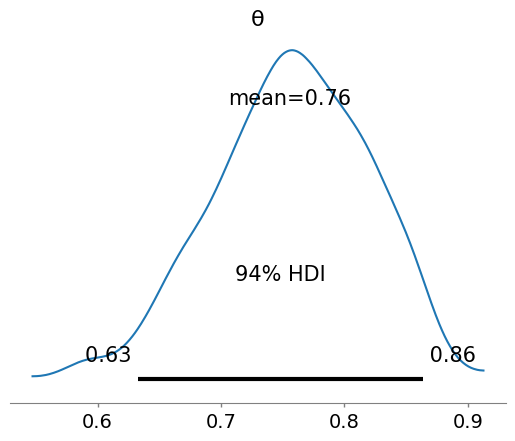

In [ ]:
#vizualize 1000 samples from the analytic model.
#Recall that analytic_FT = pz.Beta(alpha = alpha_old + 7,beta = beta_old + n - k )
#This is beta dist. with the total number of makes and total misses as parameters
az.plot_posterior( {'θ' : analytic_FT.rvs(1000)} )

**Task12**:

List similarities and differences between the pymc model's samples, and the analytic model's samples. Discuss these with at least one other person

**Answer12**:

Need to Know:

If you think the analytic solution and pymc model are giving basically the same samples, then you're right! In fact, they are the same: based on our assumptions, **drawing samples from the pymc model's posterior is the same as drawing samples from an analyticly derived solution**.

----

MCMC--the engine that powers pymc--is guranteed to guess in the same way as an exact mathematical formula. Important point here: "guess in the same way" the actual guesses are different each time you run the code on your computer (unless you set a random seed). More on that nuance next unit.

For now, recall the formula we've been working with: "$p(θ|y) ∝ p(y|θ)p(θ)$". I told you to think of this as our observations combined with our assumptions; that's a desription of the right hand side of the $∝$.

You can also think of the left hand side, $p(θ|y)$, as a "guessing machine for the truth given our observations".

That's all we were ever after: a machine that can make logical guesses about the truth--it this case, logical guesses about Victor Wembanyama's free throws after we've seen him shoot free throws.


Now that we have some idea what our fancy pymc model gives us, let's use our it to make predictions.

In [ ]:
#The below function needs to know two things in order to make predictions:
#-the samples from the posterior; these are stored in idata_FT
#-the model that generated those samples, which we called wmby_FT_model
# The last input tells the function to store those predictions in idata_FT

pm.sample_posterior_predictive(idata_FT, model=wmby_FT_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

**Task13**:

Does our model predict that Wembanyama will make his next free throw?

Use the output above.

Hints: We need the posterior predictive distribution. Also, what symbol/name did we give our data, our likelihood when we created wmby_FT_model?

In [ ]:
#ANSWER13

#stack the two MCMC chains together for a total of 2000 samples, or predictions
#Why 2000? 1000 per chain. Why 1000? Because we asked for 1000 samples when
#we specified the model.
stacked_FT = az.extract(idata_FT, group="posterior_predictive")

In [ ]:
#ANSWER13 cont.

#there's some data indexing going on here that I don't want you to linger on.
#I'll summarize the result: 9 simulated FTs. Why 9? Because we fed our model
#FTs as a batch of 9, and it uses each batch of 9 to calculate a FT%, θ
stacked_FT.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 0, 1, 0, 1, 1, 0, 1])

**Answer13 cont.**:

Nice to Know

The above array is a prediction for the next block of 9 free throws.

If a 1 is first, that means we predict Wemby will make the next FT, with a 0 corresponding to a miss. This guess is based only on his first two games in the NBA, and his prior performance in Euroleague.

Finally, rerunning the model will generate a new guess drawn from the posterior. So we shouldn't be so concerned with indiviual guesses.

Think of it this way: having a guess is like being gifted a banana, and having a pymc model is like being gifted a banana plantation.

Yes, the banana planatation/pymc model may be a little more complex than you bargained for, but there's no arguing that owning the means of production is more powerful than owning a single product.

###**Predicting  Wemby FT in 2024/2025**

Victor Wembanyama played more than 2 games in the NBA last year--and more relevantly to us, he took more than 9 free throws. In fact, he made 292 out of 367 free throws in the 2023/2024 NBA season.


As of this writing, the 2024/2025 NBA season has yet to occur, but we can use those 367 FT attempts to generate

In [ ]:
#Wemby's FTs in the 2023/2024 season, makes then misses
FT_data_2324 = np.repeat([1,0], repeats = [292,75])

In [ ]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 24. , beta = 8.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

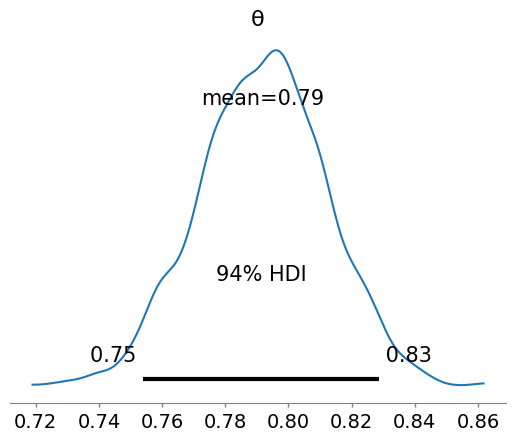

In [ ]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT_2324)

In [ ]:
#Generate the actual predictions for Wemby's next 2000 FTs
pm.sample_posterior_predictive(idata_FT_2324, model=wmby_FT_2324_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [ ]:
#stack the two MCMC chains together
stacked_FT_2324 = az.extract(idata_FT_2324, group="posterior_predictive")

In [ ]:
#idata_FT_2324.posterior_predictive.y.to_series().values
stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

And there you have it, predictions for Wembanyama's next 367 free throws. We'll check this at the end of the NBA regular season this year, and see how our model did.

**Task14**:

What could we do to improve our model?

**Answer14**:

Nice to Know:

Lots, but what first comes to mind is breaking the free throws up by game. That would mimic the real world much better. We'll do that a couple units from now.

Other answers are probably correct; the general guidline is to do anything that will make your model more like the real world.

###**Summary**

In this unit, we answered the question: What will Victor Wembanyama's true Free Throw percentage (FT%) be in the NBA?

We did this by considering prior knowledge we had about Wembanyama's FT shooting--we landed on his previous FT shooting in Euroleague, although we proposed other valid assumptions.

In writing down our assumptions, we found it necceesary to think mathematically about probability and the physical act of FT shooting. This led us to probability density functions (pdf) as a good summary of our knowledge.

Instead of stopping there, we saw that we could alter our assumption by processing new information through with a likelihood, another pdf.

We then combined our new information with our prior knowledge by multipying our pdfs. This gave us a way to make a guess post new information, and we called this a posterior.

And this posterior *is* our answer. It can give us different precise estimates, like the mean, median, and mode, and gives us a probability for all the values Wembanyama's truw FT% could be.

But we didn't stop there! Our analytic solution happened to work out well mathematically, but we want a tool that works nearly everytime.

So, we took out a pymc model for a test drive. We played a bit with its many metaphorical knobs and buttons to get predictions for Wembanyama's future FTs.

Along the way, we learned that models like pymc guranttee that we will nearly always have access to samples of a posterior--so long as we use our tools correctly.

To wrap up this unit, let's end with a final task:





**Task15**:

What is Victor Wembanyama's true Free Throw percentage (FT%) in the NBA?

**Answer15**:

Any answer from the posterior we generated is reasonable; many of y'all likely picked the fan favorites of mean, median, or mode. I'm partial to 78%. My reasoning: Wembanyama's shooting form looked good all season, although I do think he was a bit wowed by the bright lights of fame at the beginning of the season, and that weighed his shooting down. But overall, I think the mean, median, and mode from the mdoel we built are underestimates.

If you're a bit frustrated by my answer, you should be: I should have accounted for these assumptions in my prior, at the very least.

We will start to incorporate assumptions like mine in your project for this unit, and we will continue to learn how to refine our assumptions in the next unit.